# Project Wrangling and Analyze Data by Oluwatobi Adebanwo
<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assess Data</a></li>
<li><a href="#quality">Quality Issues</a></li>
<li><a href="#tidy">Tidyness Issues</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#master">Cleaned Master Dataset</a></li>
<li><a href="#insights">Data Insights</a></li>    
</ul>

<a id='gather'></a>
## Data Gathering

### 1. Importing the downloaded WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3230]:
import pandas as pd

In [3231]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 2. Importing the image prediction (image_predictions.tsv) file using request library

In [3232]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], 'wb') as image:
    image.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3233]:
import json

In [3234]:
with open('tweet_json.txt', 'r') as tweet_data:
    line = tweet_data.readlines()
data = []
for line in line:
    data.append(json.loads(line))
twitter_api = pd.DataFrame(data, columns = ['id', 'created_at', 'favorite_count', 'retweet_count',])
twitter_api.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


<a id='assess'></a>
## Assessing Data
Assessing the three(3) data for **quality and tidiness issues**. 

In [3235]:
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3236]:
twitter_archive_enhanced.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [3237]:
twitter_archive_enhanced.retweeted_status_id.nunique()

181

In [3238]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3239]:
twitter_archive_enhanced.rating_numerator.max()

1776

In [3240]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [3241]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [3242]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3243]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,5.803360e-02,False
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,1.050740e-01,True
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,1.260730e-01,True
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,1.649670e-02,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,3.824300e-02,True
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese_mountain_dog,0.951337,True,Greater_Swiss_Mountain_dog,0.016849,True,Appenzeller,1.084920e-02,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,7.820550e-02,True
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,1.003710e-01,False
1981,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,3.228240e-03,False


In [3244]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [3245]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [3246]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [3247]:
twitter_api.sample(5)

,id,created_at,favorite_count,retweet_count
1404,699088579889332224,Mon Feb 15 04:31:20 +0000 2016,2451,715
1401,699413908797464576,Tue Feb 16 02:04:04 +0000 2016,2258,688
1187,718246886998687744,Fri Apr 08 01:19:36 +0000 2016,2115,565
90,874434818259525634,Tue Jun 13 01:14:41 +0000 2017,0,15546
949,751950017322246144,Sun Jul 10 01:23:49 +0000 2016,3415,1060


In [3248]:
twitter_api.tail()

,id,created_at,favorite_count,retweet_count
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48
2353,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,2535,532


In [3249]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   created_at      2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [3250]:
twitter_api.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [3251]:
twitter_api[twitter_api.id.duplicated()]

,id,created_at,favorite_count,retweet_count


<a id='quality'></a>
## Quality Issues

**twitter_archive_enhanced**
- retweet data are not needed
- timestamp should be Datetime format not string format.
- rating_numerator are higher than rating denominator.
- Replies data should be removed as they're not original tweets

**image predictions**

- Image prediction configuration should be shown as percentage

**twitter_api**

- id should be renamed to tweet_id
- retweet_count column should be dropped
- created_at should be Datetime format not string format.

<a id='tidy'></a>
## Tidiness Issues
- favorite count and retweet count from the twitter api should be joined with the twitter_archive_enahnced table.

- dog 'stage' column should be created for the observations - doggo, floofer, pupper, puppo in the twitter_archive_enhanced table.

<a id='clean'></a>
## Data Cleaning

In [3252]:
# make a copy of each file
tweet_archive = twitter_archive_enhanced.copy()
img_prediction = image_predictions.copy()
tweet_api = twitter_api.copy()

### Solving Quality issues

### Retweet data are not needed
#### Define
Remove retweet rows having values in the retweeted_status_id column and drop all retweet columns

#### code

In [3253]:
tweet_archive = tweet_archive[~tweet_archive.retweeted_status_id.notnull()]

In [3254]:
tweet_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1, inplace = True)

#### test

In [3255]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Replies data should be removed as they're not original tweets
#### Define
Remove rows having values in the in_reply_to_status_id column
Drop columns (in_reply_to_status_id, in_reply_to_user_id)
I'll also drop source column, as it is not useful for my analysis

#### code

In [3256]:
tweet_archive = tweet_archive[~tweet_archive.in_reply_to_status_id.notnull()]

In [3257]:
tweet_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source'], axis=1, inplace = True)

#### test

In [3258]:
tweet_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Rating numerator higher than rating denominator

#### Define
Most ratings are over 10, which should not be so. why? because "they're good dogs brent" therefore we drop the rating_denominator as it won't be useful anymore for analysis and rename the rating_numerator to 'ratings'.

#### code

In [3259]:
tweet_archive.drop('rating_denominator', axis = 1, inplace = True)
tweet_archive.rename({'rating_numerator':'ratings'}, axis=1, inplace=True)

#### test

In [3260]:
tweet_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,ratings,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None


### Timestamp format to be converted from object datatype to Datetime format

#### Define
timestamp datatype will be converted to datatime format using pandas and timezone removed.

#### code

In [3261]:
tweet_archive['timestamp'] = pd.to_datetime(tweet_archive['timestamp']).dt.tz_localize(None)

#### test

In [3262]:
tweet_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,ratings,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None


### Image prediction configuration should be shown as percentage
#### Define
according to the description of the data, image prediction were shown as percentage.
- create new columns by multiply prediction column by 100 and rounded to 0 significant figure adding percentage.
- dropping unused columns

#### code

In [3263]:
img_prediction['p1_conf'] = pd.Series(['{0:.0f}%'.format(val * 100) for val in img_prediction['p1_conf']])
img_prediction['p2_conf'] = pd.Series(['{0:.0f}%'.format(val * 100) for val in img_prediction['p2_conf']])
img_prediction['p3_conf'] = pd.Series(['{0:.0f}%'.format(val * 100) for val in img_prediction['p3_conf']])

#### test

In [3264]:
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,47%,True,collie,16%,True,Shetland_sheepdog,6%,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,51%,True,miniature_pinscher,7%,True,Rhodesian_ridgeback,7%,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,60%,True,malinois,14%,True,bloodhound,12%,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,41%,True,redbone,36%,True,miniature_pinscher,22%,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56%,True,Rottweiler,24%,True,Doberman,15%,True


### Rename id from twitter_api to tweet_id
#### Define
use rename function to change id to tweet id in tweet_api table.
This will make merging with tweet_archive possible

#### code

In [3265]:
tweet_api.rename({'id':'tweet_id', 'created_at':'timestamp'}, axis=1, inplace=True)

#### test

In [3266]:
tweet_api.head(2)

,tweet_id,timestamp,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514


### Created_at datatype should be datetime

#### Define
convert to datetime format using pandas

#### code

In [3267]:
tweet_api['timestamp'] = pd.to_datetime(tweet_api['timestamp']).dt.tz_localize(None)

#### test

In [3268]:
tweet_api.head(2)

,tweet_id,timestamp,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,39467,8853
1,892177421306343426,2017-08-01 00:17:27,33819,6514


### retweet_count not needed

#### Define
Drop retweet columns

#### code

In [3269]:
tweet_api.drop(['retweet_count'], axis=1, inplace = True)

#### test

In [3270]:
tweet_api.head(2)

,tweet_id,timestamp,favorite_count
0,892420643555336193,2017-08-01 16:23:56,39467
1,892177421306343426,2017-08-01 00:17:27,33819


###  Solving Tidiness Issues

#### dog 'stage' column should be created for the observations - doggo, floofer, pupper, puppo in the twitter_archive_enhanced table.

#### Define
Replace 'None' values with empty strings and combine doggo, floofer, pupper, puppo into new a column called 'dog_stage' dropping irrelevant columns 

#### code

In [3271]:
tweet_archive.replace(to_replace='None', value='', inplace=True)
tweet_archive['dog_stage'] = tweet_archive['doggo'] + tweet_archive['floofer'] + tweet_archive['pupper'] + tweet_archive['puppo']
tweet_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace =True)

#### test

In [3272]:
tweet_archive.replace(to_replace='', value='None', inplace=True)
tweet_archive.head()

,tweet_id,timestamp,text,expanded_urls,ratings,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


In [3273]:
tweet_archive.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

#### It was observed that dog_stage column contains some unwanted strings, therefore we remove rows having these values.
('doggopuppo','doggofloofer', 'doggopupper')

In [3274]:
tweet_archive = tweet_archive[tweet_archive['dog_stage'].str.contains('doggopuppo|doggofloofer|doggopupper') == False]

#### test

In [3275]:
tweet_archive.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### twitter api should be merged with the twitter_archive_enhanced table.

#### Define
Use pandas merge to combine tweet_archive and tweet_api using tweet_id and timestamp as common columns

#### code

In [3276]:
df = pd.merge(tweet_archive, tweet_api)

#### test

In [3277]:
df.head()

,tweet_id,timestamp,text,expanded_urls,ratings,name,dog_stage,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,41048


<a id='master'></a>
### Cleaned Master Dataset

In [3278]:
WeRateDogs = pd.merge(df, img_prediction)
WeRateDogs.head()

,tweet_id,timestamp,text,expanded_urls,ratings,name,dog_stage,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,10%,False,bagel,9%,False,banana,8%,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32%,True,Pekinese,9%,True,papillon,7%,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,72%,True,malamute,8%,True,kelpie,3%,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,17%,False,Labrador_retriever,17%,True,spatula,4%,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,56%,True,English_springer,23%,True,German_short-haired_pointer,18%,True


### I'll be focusing on the first image prediction thereby dropping other prediction columns and confidence level

In [3279]:
WeRateDogs.drop(['p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'],axis = 1, inplace = True)
WeRateDogs.head(3)

,tweet_id,timestamp,text,expanded_urls,ratings,name,dog_stage,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,10%,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32%,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,72%,True


### Store as twitter_archive_master.csv

In [3280]:
WeRateDogs.to_csv('twitter_archive_master.csv', index=False)

<a id='insights'></a>
## Data Insights

#### Average Dog Ratings

In [3281]:
WeRateDogs.ratings.mean()

12.228454869964304

#### Average Favorite count

In [3282]:
WeRateDogs.favorite_count.mean()

8907.65782763896

#### Total Images uploaded

In [3283]:
WeRateDogs.img_num.sum()

2358

#### Maximum dog ratings

In [3284]:
WeRateDogs.ratings.max()

1776

#### Minimum dog ratings

In [3285]:
WeRateDogs.ratings.min()

0

#### Most common Dog Ratings

In [3286]:
WeRateDogs.ratings.mode()

0    12
Name: ratings, dtype: int64

In [3287]:
import matplotlib.pyplot as plt

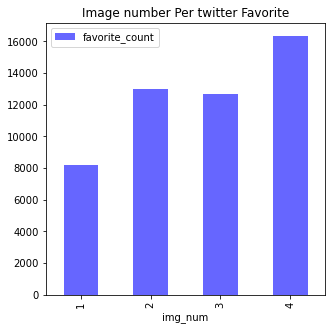

In [3288]:
WeRateDogs.groupby('img_num').favorite_count.mean().plot(kind= 'bar', figsize=(5,5), alpha = 0.6, color= 'blue')
plt.title('Image number Per twitter Favorite'), plt.legend();

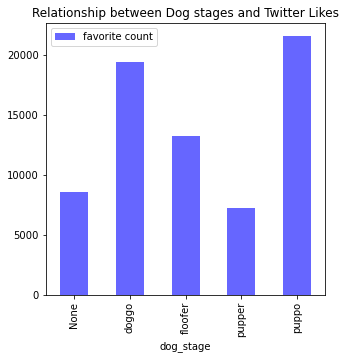

In [3289]:
WeRateDogs.groupby('dog_stage').favorite_count.mean().plot(kind='bar',figsize=(5,5), alpha = 0.6, color= 'blue', label = 'favorite count')
plt.title('Relationship between Dog stages and Twitter Likes')
plt.legend();